<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [77]:
import numpy as np

np.random.seed(812)

X = np.array(([0,0,1],
              [0,1,1],
              [1,0,1],
              [0,1,0],
              [1,0,0],
              [1,1,1],
              [0,0,0]), dtype=int)

y = np.array(([0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]), dtype=int)

In [78]:
class NeuralNetwork: 
    def __init__(self):
        # Set upArchietecture 
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        #Weighted sume of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Acivations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [3]:
nn = NeuralNetwork()
iterations = list(range(0, 1000))
cost = []
for i in range(1000):
    cost.append(np.mean(np.square(y - nn.feed_forward(X))))
    nn.train(X,y)

In [4]:
print("Predicted Output: \n" + str(nn.feed_forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y - nn.feed_forward(X))))) # mean sum squared loss

Predicted Output: 
[[0.01031352]
 [0.94567228]
 [0.95424826]
 [0.95284546]
 [0.95511471]
 [0.07129289]
 [0.07869153]]
Loss: 
0.002952052148215557


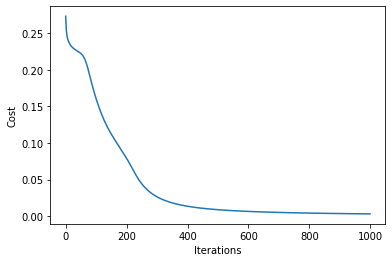

In [150]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Using Welch Labs Implementation

In [6]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [7]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [8]:
NN = Neural_Network()

In [9]:
T = trainer(NN)

In [10]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.500000
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43


In [11]:
print("Predicted Output: \n" + str(NN.forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss

Predicted Output: 
[[1.51033164e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99118573e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.78693932e-17]]
Loss: 
0.1428572538447501


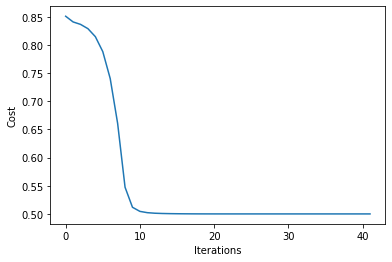

In [12]:
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


## Parts
1. Gathering & Transforming the Data

2. Making MNIST a Binary Problem

3. Estimating your Neural Network (the part you focus on)

## Gathering the Data
keras has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row.

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [14]:
# input image dimensions
img_rows, img_cols = 28, 28

In [15]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [17]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

## Making MNIST a Binary Problem
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [18]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [19]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [73]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [119]:
y_train = y_train.reshape(-1,1)

In [120]:
y_test = y_test.reshape(-1,1)

# Estimating Your `net

In [147]:
class NeuralNetwork: 
    def __init__(self):
        # Set upArchietecture 
        self.inputs = 784
        self.hiddenNodes = 64
        self.outputNodes = 1
        
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes) #2x3
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes) #3x1
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        #Weighted sume of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Acivations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [149]:
x_batch = x_train[:100]
y_batch = y_train[:100]

In [155]:
nn_mnist = NeuralNetwork()
iterations = list(range(0, 1000))
cost = []
for i in range(1000):
    cost.append(np.mean(np.square(y_train - nn_mnist.feed_forward(x_train))))
    nn_mnist.train(x_train,y_train)

In [157]:
print("Predicted Output: \n" + str(nn_mnist.feed_forward(x_batch))) 
print("Loss: \n" + str(np.mean(np.square(y_batch - nn_mnist.feed_forward(x_batch))))) # mean sum squared loss

Predicted Output: 
[[9.95546331e-17]
 [2.07359662e-17]
 [1.65451202e-17]
 [7.01925376e-16]
 [2.51060485e-18]
 [3.54525014e-19]
 [1.07128449e-14]
 [7.86371623e-17]
 [2.78562656e-15]
 [8.21392744e-18]
 [2.94081848e-13]
 [8.37620185e-14]
 [3.08272166e-14]
 [1.83421670e-15]
 [4.02581751e-16]
 [1.89177558e-18]
 [1.01825509e-15]
 [3.66079420e-18]
 [1.17602878e-16]
 [3.90141495e-17]
 [1.37251407e-18]
 [5.88498786e-18]
 [9.09213084e-19]
 [1.81096046e-15]
 [4.29794630e-18]
 [3.47574568e-15]
 [3.11846823e-13]
 [1.55869278e-17]
 [1.49256309e-16]
 [4.68711467e-17]
 [3.61992850e-15]
 [5.61582460e-19]
 [7.04465977e-16]
 [9.08387443e-18]
 [5.35362134e-17]
 [2.18250731e-17]
 [2.72504160e-16]
 [1.26825536e-16]
 [1.31949452e-13]
 [9.34436040e-19]
 [3.04157278e-15]
 [2.39643785e-17]
 [2.92616259e-15]
 [1.33288999e-17]
 [6.97570819e-16]
 [7.90327725e-17]
 [1.81351013e-15]
 [2.57379889e-14]
 [5.76835301e-14]
 [5.30502042e-16]
 [3.28422748e-15]
 [2.96224786e-20]
 [1.93449494e-16]
 [5.16977911e-14]
 [7.57300

In [165]:
preds = nn_mnist.feed_forward(x_test)

In [167]:
preds[preds >= .5] = 1

In [168]:
preds[preds < .5] = 0

In [169]:
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [170]:
from sklearn.metrics import accuracy_score

print("accuracy:", accuracy_score(y_test, preds))

accuracy: 0.902


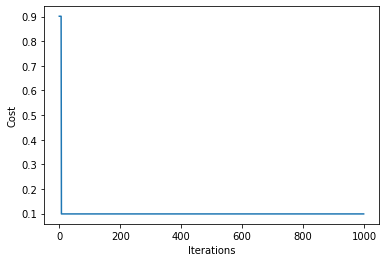

In [156]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?